In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd0ddeb4287a843c9857c3e1619fa0ec4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2026-01-28T17:50:40.023Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8942}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12530, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
type(data)

dict

In [ ]:
print(f"Number of items returned by the API: {len(data['data'])}")

Number of items returned by the API: 15


In [ ]:
type(data)

dict

In [ ]:
import pandas as pd

#this allows you to call all columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
#This is normalizes the data and make it all pretty in a dataframe

df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12530,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19981562.00000,19981562.00000,False,1793871311688.56006,NaN,1,NaN,NaN,None,2026-01-28T17:48:00.000Z,89776.33038,41648076713.93048,19.73680,0.26208,2.80023,2.18690,2.39611,-0.89589,-16.55733,1793871311688.55811,59.23890,1885302938051.58008,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
1,1027,Ethereum,ETH,ethereum,11466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694373.79631,120694373.79631,True,363742412390.33002,NaN,2,NaN,NaN,None,2026-01-28T17:48:00.000Z,3013.74787,25035317913.02465,2.88670,0.43738,3.19911,4.04372,2.63828,1.08597,-19.88181,363742412390.33112,12.02180,363742412390.33002,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
2,825,Tether USDt,USDT,tether,168700,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186428507201.91660,189485144125.95825,True,189222434687.23999,NaN,3,NaN,NaN,None,2026-01-28T17:48:00.000Z,0.99861,91020320655.19981,13.05040,0.00229,-0.02480,-0.03609,-0.03475,-0.19867,-0.14434,186170035601.33572,6.14790,189222434687.23999,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-28 17:50:40.102399
3,1839,BNB,BNB,bnb,3110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136360282.31000,136360280.87000,136360280.87000,False,123063107004.16000,NaN,4,NaN,NaN,None,2026-01-28T17:48:00.000Z,902.48499,1964816268.38145,-3.27910,0.47653,2.04085,3.78793,5.80501,3.01721,-15.83832,123063107004.15877,4.06730,123063108303.74001,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
4,52,XRP,XRP,xrp,1788,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60853233336.00000,99985724371.00000,False,191398615877.16000,NaN,5,NaN,NaN,None,2026-01-28T17:48:00.000Z,1.91426,2333647013.50603,10.91980,0.57983,1.95154,1.62842,2.85054,-13.19534,-21.99060,116488875841.34592,3.84410,191425943134.60999,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
5,5426,Solana,SOL,solana,1079,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,566068422.19096,619177427.50913,True,78125312153.56000,NaN,6,525236893.30000,66272274182.70560,None,2026-01-28T17:48:00.000Z,126.17597,3698692791.55356,9.27140,0.30016,2.08829,-0.28772,2.24522,-7.73811,-31.30973,71424231923.06776,2.35860,78125312153.56000,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
6,3408,USDC,USDC,usd-coin,36858,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71302255603.64961,71302255603.64961,False,71285959317.95000,NaN,7,60901219650.23000,60887300543.93832,None,2026-01-28T17:48:00.000Z,0.99977,13405477368.28333,-36.94900,0.01207,0.00617,0.00142,0.01113,-0.03665,-0.00829,71285959317.95477,2.35240,71285959317.95000,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-28 17:50:40.102399
7,1958,TRON,TRX,tron,1284,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94716095877.61157,94716100263.16487,True,27581

In [ ]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd0ddeb4287a843c9857c3e1619fa0ec4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #This is normalizes the data and make it all pretty in a dataframe

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df= pd.concat([df,df2], ignore_index=True)


    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data

    # If that didn't work try using the local host URL as shown in the video

In [ ]:

import os
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print("API Run Completed")
  sleep(60)
exit()

API Run Completed
API Run Completed
API Run Completed


KeyboardInterrupt: 

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12530,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19981562.00000,19981562.00000,False,1793871311688.56006,NaN,1,NaN,NaN,None,2026-01-28T17:48:00.000Z,89776.33038,41648076713.93048,19.73680,0.26208,2.80023,2.18690,2.39611,-0.89589,-16.55733,1793871311688.55811,59.23890,1885302938051.58008,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
1,1027,Ethereum,ETH,ethereum,11466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694373.79631,120694373.79631,True,363742412390.33002,NaN,2,NaN,NaN,None,2026-01-28T17:48:00.000Z,3013.74787,25035317913.02465,2.88670,0.43738,3.19911,4.04372,2.63828,1.08597,-19.88181,363742412390.33112,12.02180,363742412390.33002,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
2,825,Tether USDt,USDT,tether,168700,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186428507201.91660,189485144125.95825,True,189222434687.23999,NaN,3,NaN,NaN,None,2026-01-28T17:48:00.000Z,0.99861,91020320655.19981,13.05040,0.00229,-0.02480,-0.03609,-0.03475,-0.19867,-0.14434,186170035601.33572,6.14790,189222434687.23999,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-28 17:50:40.102399
3,1839,BNB,BNB,bnb,3110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136360282.31000,136360280.87000,136360280.87000,False,123063107004.16000,NaN,4,NaN,NaN,None,2026-01-28T17:48:00.000Z,902.48499,1964816268.38145,-3.27910,0.47653,2.04085,3.78793,5.80501,3.01721,-15.83832,123063107004.15877,4.06730,123063108303.74001,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
4,52,XRP,XRP,xrp,1788,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60853233336.00000,99985724371.00000,False,191398615877.16000,NaN,5,NaN,NaN,None,2026-01-28T17:48:00.000Z,1.91426,2333647013.50603,10.91980,0.57983,1.95154,1.62842,2.85054,-13.19534,-21.99060,116488875841.34592,3.84410,191425943134.60999,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
5,5426,Solana,SOL,solana,1079,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,566068422.19096,619177427.50913,True,78125312153.56000,NaN,6,525236893.30000,66272274182.70560,None,2026-01-28T17:48:00.000Z,126.17597,3698692791.55356,9.27140,0.30016,2.08829,-0.28772,2.24522,-7.73811,-31.30973,71424231923.06776,2.35860,78125312153.56000,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
6,3408,USDC,USDC,usd-coin,36858,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71302255603.64961,71302255603.64961,False,71285959317.95000,NaN,7,60901219650.23000,60887300543.93832,None,2026-01-28T17:48:00.000Z,0.99977,13405477368.28333,-36.94900,0.01207,0.00617,0.00142,0.01113,-0.03665,-0.00829,71285959317.95477,2.35240,71285959317.95000,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-28 17:50:40.102399
7,1958,TRON,TRX,tron,1284,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94716095877.61157,94716100263.16487,True,27581

In [ ]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12530,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19981562.00000,19981562.00000,False,1793871311688.56006,NaN,1,NaN,NaN,None,2026-01-28T17:48:00.000Z,89776.33038,41648076713.93048,19.73680,0.26208,2.80023,2.18690,2.39611,-0.89589,-16.55733,1793871311688.55811,59.23890,1885302938051.58008,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
1,1027,Ethereum,ETH,ethereum,11466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694373.79631,120694373.79631,True,363742412390.33002,NaN,2,NaN,NaN,None,2026-01-28T17:48:00.000Z,3013.74787,25035317913.02465,2.88670,0.43738,3.19911,4.04372,2.63828,1.08597,-19.88181,363742412390.33112,12.02180,363742412390.33002,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
2,825,Tether USDt,USDT,tether,168700,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186428507201.91660,189485144125.95825,True,189222434687.23999,NaN,3,NaN,NaN,None,2026-01-28T17:48:00.000Z,0.99861,91020320655.19981,13.05040,0.00229,-0.02480,-0.03609,-0.03475,-0.19867,-0.14434,186170035601.33572,6.14790,189222434687.23999,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-28 17:50:40.102399
3,1839,BNB,BNB,bnb,3110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136360282.31000,136360280.87000,136360280.87000,False,123063107004.16000,NaN,4,NaN,NaN,None,2026-01-28T17:48:00.000Z,902.48499,1964816268.38145,-3.27910,0.47653,2.04085,3.78793,5.80501,3.01721,-15.83832,123063107004.15877,4.06730,123063108303.74001,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
4,52,XRP,XRP,xrp,1788,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60853233336.00000,99985724371.00000,False,191398615877.16000,NaN,5,NaN,NaN,None,2026-01-28T17:48:00.000Z,1.91426,2333647013.50603,10.91980,0.57983,1.95154,1.62842,2.85054,-13.19534,-21.99060,116488875841.34592,3.84410,191425943134.60999,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
5,5426,Solana,SOL,solana,1079,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,566068422.19096,619177427.50913,True,78125312153.56000,NaN,6,525236893.30000,66272274182.70560,None,2026-01-28T17:48:00.000Z,126.17597,3698692791.55356,9.27140,0.30016,2.08829,-0.28772,2.24522,-7.73811,-31.30973,71424231923.06776,2.35860,78125312153.56000,None,2026-01-28T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-28 17:50:40.102399
6,3408,USDC,USDC,usd-coin,36858,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71302255603.64961,71302255603.64961,False,71285959317.95000,NaN,7,60901219650.23000,60887300543.93832,None,2026-01-28T17:48:00.000Z,0.99977,13405477368.28333,-36.94900,0.01207,0.00617,0.00142,0.01113,-0.03665,-0.00829,71285959317.95477,2.35240,71285959317.95000,None,2026-01-28T17:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-28 17:50:40.102399
7,1958,TRON,TRX,tron,1284,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94716095877.61157,94716100263.16487,True,27581

In [ ]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.31424,2.83777,2.20783,2.41675,-0.82755,-16.49075
Ethereum,0.47132,3.20704,4.04626,2.63619,1.15825,-19.87944
Tether USDt,0.00165,-0.01547,-0.05830,-0.03644,-0.18677,-0.13682
BNB,0.50668,2.05773,3.86900,5.82032,3.10348,-15.80849
XRP,0.54652,1.95941,1.65306,2.82290,-13.15685,-21.96375
Solana,0.25694,2.06084,-0.26977,2.19644,-7.69504,-31.28966
USDC,0.00670,0.00435,-0.00128,0.00560,-0.03165,-0.00738
TRON,0.21249,-0.77039,-2.18648,3.11836,3.68088,0.00239
Dogecoin,0.27652,2.37724,2.49733,0.90121,-15.73002,-30.99083


In [ ]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.31424
              quote.USD.percent_change_24h     2.83777
              quote.USD.percent_change_7d      2.20783
              quote.USD.percent_change_30d     2.41675
              quote.USD.percent_change_60d    -0.82755
              quote.USD.percent_change_90d   -16.49075
Ethereum      quote.USD.percent_change_1h      0.47132
              quote.USD.percent_change_24h     3.20704
              quote.USD.percent_change_7d      4.04626
              quote.USD.percent_change_30d     2.63619
              quote.USD.percent_change_60d     1.15825
              quote.USD.percent_change_90d   -19.87944
Tether USDt   quote.USD.percent_change_1h      0.00165
              quote.USD.percent_change_24h    -0.01547
              quote.USD.percent_change_7d     -0.05830
              quote.USD.percent_change_30d    -0.03644
              quote.USD.percent_change_60d    -0.18677
              quote.USD.percent_change_90d    -0.13682
BNB           quote.USD.percent_change_1h      0.50668
              quote.USD.percent_change_24h     2.05773
              quote.USD.percent_change_7d      3.86900
              quote.USD.percent_change_30d     5.82032
              quote.USD.percent_change_60d     3.10348
              quote.USD.percent_change_90d   -15.80849
XRP           quote.USD.percent_change_1h      0.54652
              quote.USD.percent_change_24h     1.95941
              quote.USD.percent_change_7d      1.65306
              quote.USD.percent_change_30d     2.82290
              quote.USD.percent_change_60d   -13.15685
              quote.USD.percent_change_90d   -21.96375
Solana        quote.USD.percent_change_1h      0.25694
              quote.USD.percent_change_24h     2.06084
              quote.USD.percent_change_7d     -0.26977
              quote.USD.percent_change_30d     2.19644
              quote.USD.percent_change_60d    -7.69504
              quote.USD.percent_change_90d   -31.28966
USDC          quote.USD.percent_change_1h      0.00670
              quote.USD.percent_change_24h     0.00435
              quote.USD.percent_change_7d     -0.00128
              quote.USD.percent_change_30d     0.00560
              quote.USD.percent_change_60d    -0.03165
              quote.USD.percent_change_90d    -0.00738
TRON          quote.USD.percent_change_1h      0.21249
              quote.USD.percent_change_24h    -0.77039
              quote.USD.percent_change_7d     -2.18648
              quote.USD.percent_change_30d     3.11836
              quote.USD.percent_change_60d     3.68088
              quote.USD.percent_change_90d     0.00239
Dogecoin      quote.USD.percent_change_1h      0.27652
              quote.USD.percent_change_24h     2.37724
              quote.USD.percent_change_7d      2.49733
              quote.USD.percent_change_30d     0.90121
              quote.USD.percent_change_60d   -15.73002
              quote.USD.percent_change_90d   -30.99083
Cardano       quote.USD.percent_change_1h      0.36383
              quote.USD.percent_change_24h     2.41184
              quote.USD.percent_change_7d      2.32784
              quote.USD.percent_change_30d    -0.40723
              quote.USD.percent_change_60d   -13.84088
              quote.USD.percent_change_90d   -40.49258
Bitcoin Cash  quote.USD.percent_change_1h      0.27006
              quote.USD.percent_change_24h     0.68218
              quote.USD.percent_change_7d      2.76629
              quote.USD.percent_change_30d    -0.68500
              quote.USD.percent_change_60d    13.15187
              quote.USD.percent_change_90d    10.49739
Hyperliquid   quote.USD.percent_change_1h     -0.28757
              quote.USD.percent_change_24h    19.42566
              quote.USD.percent_change_7d     58.99506
              quote.USD.percent_change_30d    25.95576
              quote.USD.percent_change_60d    -4.81390
              quote.USD.percent_change_90d   -25.885

In [ ]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.31424
             quote.USD.percent_change_24h   2.83777
             quote.USD.percent_change_7d    2.20783
             quote.USD.percent_change_30d   2.41675
             quote.USD.percent_change_60d  -0.82755
             quote.USD.percent_change_90d -16.49075
Ethereum     quote.USD.percent_change_1h    0.47132
             quote.USD.percent_change_24h   3.20704
             quote.USD.percent_change_7d    4.04626
             quote.USD.percent_change_30d   2.63619
             quote.USD.percent_change_60d   1.15825
             quote.USD.percent_change_90d -19.87944
Tether USDt  quote.USD.percent_change_1h    0.00165
             quote.USD.percent_change_24h  -0.01547
             quote.USD.percent_change_7d   -0.05830
             quote.USD.percent_change_30d  -0.03644
             quote.USD.percent_change_60d  -0.18677
             quote.USD.percent_change_90d  -0.13682
BNB          quote.USD.percent_change_1h    0.50668
             quote.USD.percent_change_24h   2.05773
             quote.USD.percent_change_7d    3.86900
             quote.USD.percent_change_30d   5.82032
             quote.USD.percent_change_60d   3.10348
             quote.USD.percent_change_90d -15.80849
XRP          quote.USD.percent_change_1h    0.54652
             quote.USD.percent_change_24h   1.95941
             quote.USD.percent_change_7d    1.65306
             quote.USD.percent_change_30d   2.82290
             quote.USD.percent_change_60d -13.15685
             quote.USD.percent_change_90d -21.96375
Solana       quote.USD.percent_change_1h    0.25694
             quote.USD.percent_change_24h   2.06084
             quote.USD.percent_change_7d   -0.26977
             quote.USD.percent_change_30d   2.19644
             quote.USD.percent_change_60d  -7.69504
             quote.USD.percent_change_90d -31.28966
USDC         quote.USD.percent_change_1h    0.00670
             quote.USD.percent_change_24h   0.00435
             quote.USD.percent_change_7d   -0.00128
             quote.USD.percent_change_30d   0.00560
             quote.USD.percent_change_60d  -0.03165
             quote.USD.percent_change_90d  -0.00738
TRON         quote.USD.percent_change_1h    0.21249
             quote.USD.percent_change_24h  -0.77039
             quote.USD.percent_change_7d   -2.18648
             quote.USD.percent_change_30d   3.11836
             quote.USD.percent_change_60d   3.68088
             quote.USD.percent_change_90d   0.00239
Dogecoin     quote.USD.percent_change_1h    0.27652
             quote.USD.percent_change_24h   2.37724
             quote.USD.percent_change_7d    2.49733
             quote.USD.percent_change_30d   0.90121
             quote.USD.percent_change_60d -15.73002
             quote.USD.percent_change_90d -30.99083
Cardano      quote.USD.percent_change_1h    0.36383
             quote.USD.percent_change_24h   2.41184
             quote.USD.percent_change_7d    2.32784
             quote.USD.percent_change_30d  -0.40723
             quote.USD.percent_change_60d -13.84088
             quote.USD.percent_change_90d -40.49258
Bitcoin Cash quote.USD.percent_change_1h    0.27006
             quote.USD.percent_change_24h   0.68218
             quote.USD.percent_change_7d    2.76629
             quote.USD.percent_change_30d  -0.68500
             quote.USD.percent_change_60d  13.15187
             quote.USD.percent_change_90d  10.49739
Hyperliquid  quote.USD.percent_change_1h   -0.28757
             quote.USD.percent_change_24h  19.42566
             quote.USD.percent_change_7d   58.99506
             quote.USD.percent_change_30d  25.95576
             quote.USD.percent_change_60d  -4.81390
             quote.USD.percent_change_90d -25.88567
Monero       quote.USD.percent_change_1h   -0.01802
             quote.USD.percent_change_24h   3.44193
             quote.USD.percent_change_7d   -6.73114
             quote.USD.percent_change_30d

In [ ]:
df5.count()

,0
values,90


In [ ]:
index = pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.31424
1,Bitcoin,quote.USD.percent_change_24h,2.83777
2,Bitcoin,quote.USD.percent_change_7d,2.20783
3,Bitcoin,quote.USD.percent_change_30d,2.41675
4,Bitcoin,quote.USD.percent_change_60d,-0.82755
5,Bitcoin,quote.USD.percent_change_90d,-16.49075
6,Ethereum,quote.USD.percent_change_1h,0.47132
7,Ethereum,quote.USD.percent_change_24h,3.20704
8,Ethereum,quote.USD.percent_change_7d,4.04626
9,Ethereum,quote.USD.percent_change_30d,2.63619


In [ ]:
df7= df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.31424
1,Bitcoin,quote.USD.percent_change_24h,2.83777
2,Bitcoin,quote.USD.percent_change_7d,2.20783
3,Bitcoin,quote.USD.percent_change_30d,2.41675
4,Bitcoin,quote.USD.percent_change_60d,-0.82755
5,Bitcoin,quote.USD.percent_change_90d,-16.49075
6,Ethereum,quote.USD.percent_change_1h,0.47132
7,Ethereum,quote.USD.percent_change_24h,3.20704
8,Ethereum,quote.USD.percent_change_7d,4.04626
9,Ethereum,quote.USD.percent_change_30d,2.63619


In [ ]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [ ]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.31424
1,Bitcoin,24h,2.83777
2,Bitcoin,7d,2.20783
3,Bitcoin,30d,2.41675
4,Bitcoin,60d,-0.82755
5,Bitcoin,90d,-16.49075
6,Ethereum,1h,0.47132
7,Ethereum,24h,3.20704
8,Ethereum,7d,4.04626
9,Ethereum,30d,2.63619


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

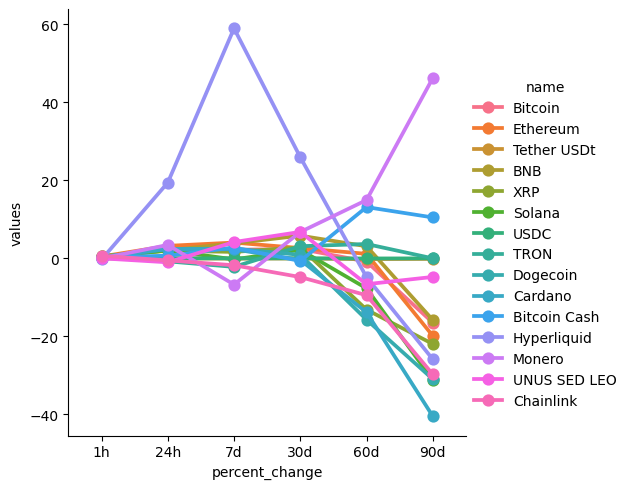

In [ ]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [ ]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query('name == "Bitcoin"')
df10

,name,quote.USD.price,timestamp
0,Bitcoin,89776.33038,2026-01-28 17:50:40.102399
15,Bitcoin,89776.33038,2026-01-28 17:50:40.275767
30,Bitcoin,89782.14555,2026-01-28 17:51:40.428668
45,Bitcoin,89902.34092,2026-01-28 17:52:40.598051


(array([20481.74357639, 20481.74375   , 20481.74392361, 20481.74409722,
        20481.74427083, 20481.74444444, 20481.74461806, 20481.74479167,
        20481.74496528]),
 [Text(20481.74357638889, 0, '17:50:45'),
  Text(20481.74375, 0, '17:51:00'),
  Text(20481.74392361111, 0, '17:51:15'),
  Text(20481.74409722222, 0, '17:51:30'),
  Text(20481.744270833333, 0, '17:51:45'),
  Text(20481.744444444445, 0, '17:52:00'),
  Text(20481.744618055556, 0, '17:52:15'),
  Text(20481.744791666668, 0, '17:52:30'),
  Text(20481.74496527778, 0, '17:52:45')])

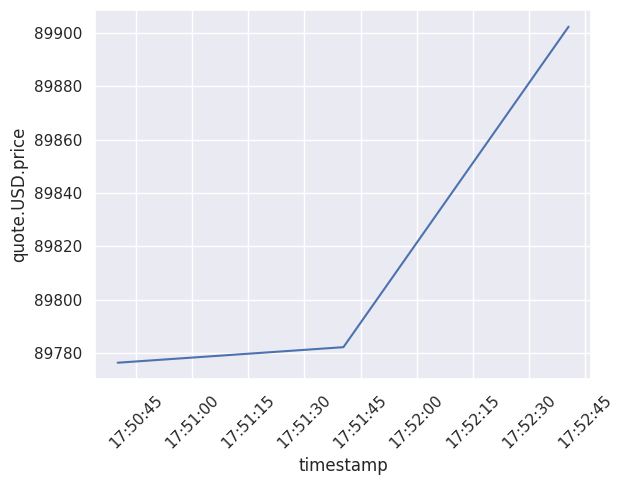

In [ ]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price', data = df10)
plt.xticks(rotation=45)